**Exploratory Data Analysis**

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

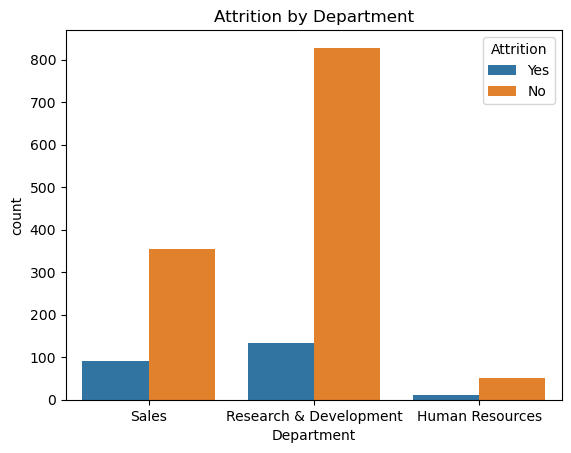

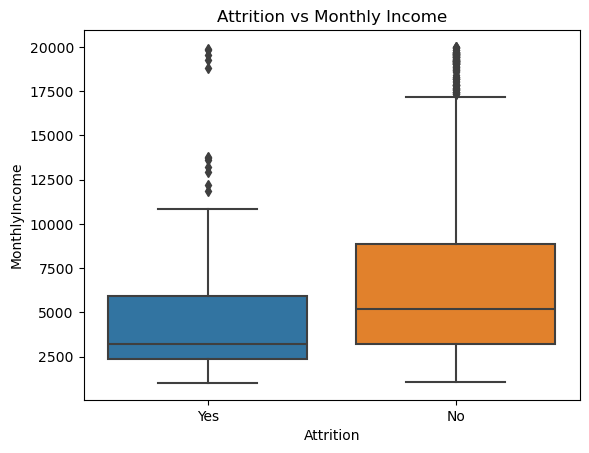

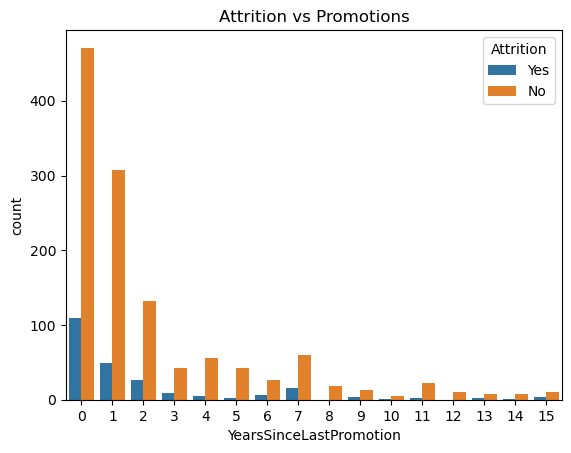

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("hr_data.csv")

print(df.head())
print(df.info())
print(df['Attrition'].value_counts())

# Attrition by Department
sns.countplot(x="Department", hue="Attrition", data=df)
plt.title("Attrition by Department")
plt.savefig("attrition_by_department.jpg", format="jpg", dpi=300)
plt.show()

# Attrition by Salary Band
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df)
plt.title("Attrition vs Monthly Income")
plt.savefig("attrition_by_Salary_Band.jpg", format="jpg", dpi=300)
plt.show()

# Attrition by Promotions
sns.countplot(x="YearsSinceLastPromotion", hue="Attrition", data=df)
plt.title("Attrition vs Promotions")
plt.savefig("attrition_by_Promotions.jpg", format="jpg", dpi=300)
plt.show()

Attrition is higher in Sales department” or “Lower salary employees leave morev

**Data Preprocessing for Model**

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode target
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])

# Features & Target
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Convert categorical features → dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Build Classification Model**

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Logistic Regression Accuracy: 0.8639455782312925
Confusion Matrix:
 [[248   7]
 [ 33   6]]
Decision Tree Accuracy: 0.8231292517006803
Confusion Matrix:
 [[236  19]
 [ 33   6]]


C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**SHAP Value Analysis**

<Figure size 640x480 with 0 Axes>

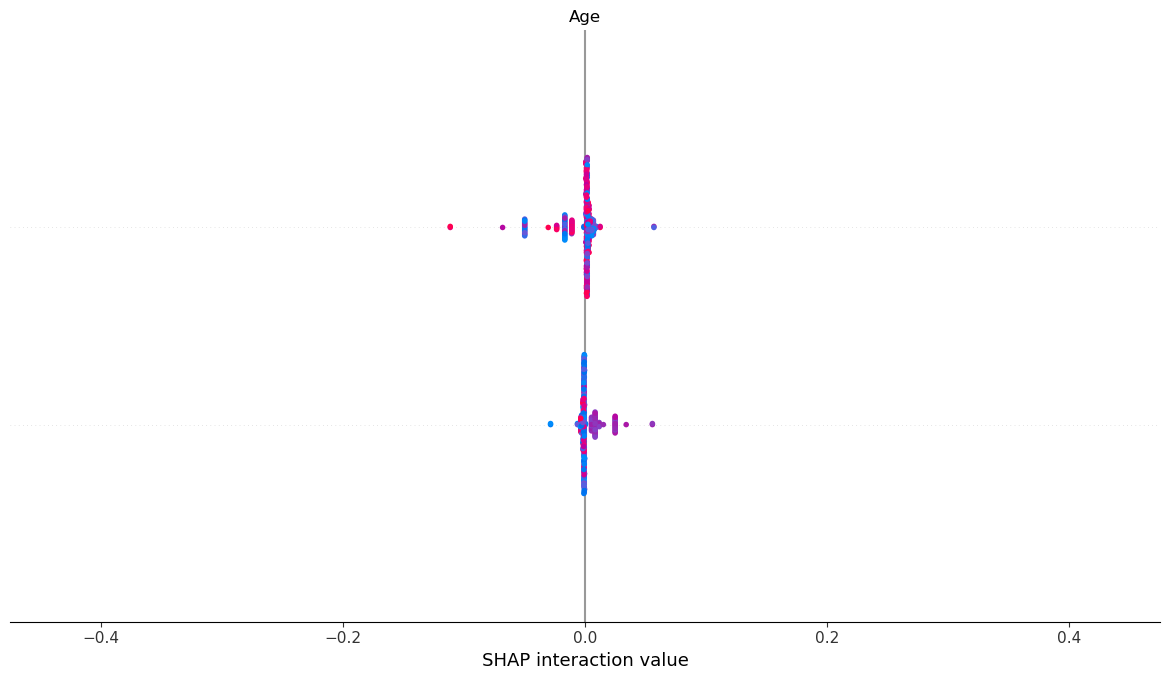

In [4]:
import shap

# Explain Decision Tree predictions
explainer = shap.TreeExplainer(dt)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [5]:
df[['EmployeeNumber','Department','Attrition','MonthlyIncome','YearsAtCompany']].to_csv("hr_dashboard_data.csv", index=False)